In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\dhruv\OneDrive\Desktop\Intership Python\Task 5\heart.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-nu

In [2]:
# Feature Engineering
# Create age buckets
bins = [29, 40, 50, 60, 70, 80]
labels = ['30-40', '41-50', '51-60', '61-70', '71-80']
data['age_bucket'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Create interaction terms
data['age_chol'] = data['age'] * data['chol']
data['age_thalach'] = data['age'] * data['thalach']
data['thalach_chol'] = data['thalach'] * data['chol']

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['age_bucket'] = label_encoder.fit_transform(data['age_bucket'])

# Display the first few rows of the dataset with the new features
print("\nDataset with New Features:")
print(data.head())



Dataset with New Features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  age_bucket  age_chol  age_thalach  thalach_chol  
0   2     3       0           2     11024         8736         35616  
1   0     3       0           2     10759         8215         31465  
2   0     3       0           4     12180         8750         21750  
3   1     3       0           3     12383         9821         32683  
4   3     2       0           3     18228         6572         31164  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 feature importances
print("\nTop 10 Feature Importances:")
print(feature_importance_df.head(10))



Top 10 Feature Importances:
         Feature  Importance
2             cp    0.145095
12          thal    0.124884
11            ca    0.115598
9        oldpeak    0.101472
7        thalach    0.083330
15   age_thalach    0.058565
14      age_chol    0.055806
0            age    0.052168
3       trestbps    0.049721
16  thalach_chol    0.048544


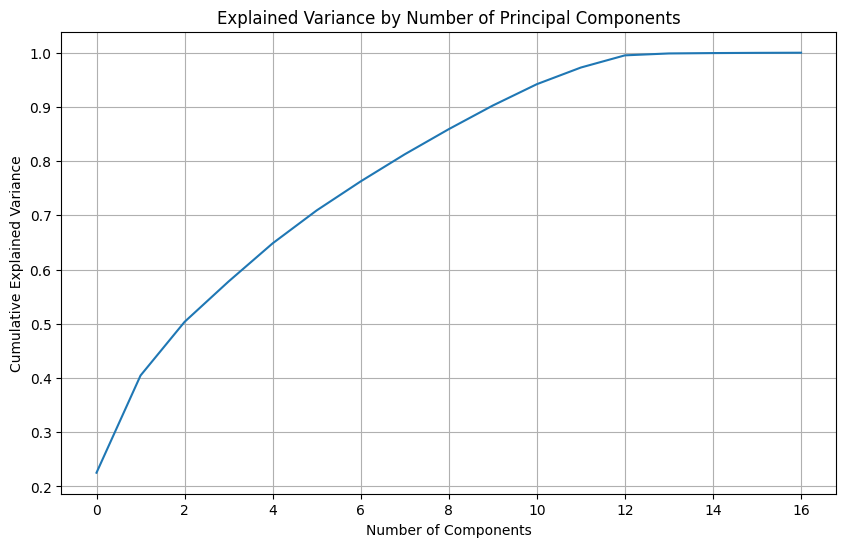


Number of components that explain at least 95% of the variance: 12


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components that explain at least 95% of the variance
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"\nNumber of components that explain at least 95% of the variance: {n_components}")